In [13]:
import cv2
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import time


# Taking an image
We will take an image and save it

In [80]:
video = cv2.VideoCapture(0) 


time.sleep(2)
check, frame = video.read()

showPic = cv2.imwrite("latest-image.jpg",frame)
print(showPic)

video.release()
cv2.destroyAllWindows 

True


<function destroyAllWindows>

> You shoud run the below to determine your mask

In [133]:
# Testing masks, press escape to stop image takng

cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
        # Red color
#     low_red = np.array([161, 155, 84])
#     high_red = np.array([179, 255, 255])
#     mask = cv2.inRange(hsv_frame, low_red, high_red)
#     red = cv2.bitwise_and(frame, frame, mask=red_mask)

    
     # White color
    # change it according to your need !
    lower_white = np.array([0,0,0], dtype=np.uint8)
    upper_white = np.array([0,0,255], dtype=np.uint8)
    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv_frame, lower_white, upper_white)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    
    nb_components, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    cv2.imshow("Frame", frame)
    cv2.imshow("CurrentMask", mask)
    
    key = cv2.waitKey(1)
    if key == 27:
        break

# Detect red

## Get the coordinates of the red dot

In [134]:
# source: https://stackoverflow.com/questions/47055771/how-to-extract-the-largest-connected-component-using-opencv-and-python
# source: https://stackoverflow.com/questions/22588146/tracking-white-color-using-python-opencv
def detect_biggest(frame):
    
    hsv_frame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Red Color
    ## Gen lower mask (0-5) and upper mask (175-180) of RED
    mask1 = cv2.inRange(hsv_frame, (0,100,150), (5,255,255))
    mask2 = cv2.inRange(hsv_frame, (175,100,150), (180,255,255))
    # Threshold the HSV image to get only white colors
    ## Merge the mask and crop the red regions
    mask = cv2.bitwise_or(mask1, mask2 )
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame, frame, mask=mask)
     
#     # White color
#     lower_white = np.array([0,0,0], dtype=np.uint8)
#     upper_white = np.array([0,0,255], dtype=np.uint8)
#     # Threshold the HSV image to get only white colors
#     mask = cv2.inRange(hsv_frame, lower_white, upper_white)
#     # Bitwise-AND mask and original image
#     res = cv2.bitwise_and(frame,frame, mask= mask)
    
    cv2.imwrite("latest-image-masked.jpg", mask)
    
    nb_components, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)
    
    # Find the largest non background component.
    # Note: range() starts from 1 since 0 is the background label.
    max_label, max_size, max_centroid = max([(i, stats[i, cv2.CC_STAT_AREA], centroids[i]) for i in range(1, nb_components)], key=lambda x: x[1])
    max_centroid_x, max_centroid_y = max_centroid
    return max_size, max_centroid_x, max_centroid_y

In [135]:
image = cv2.imread('latest-image.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
area, x_coord_center, y_coord_center = detect_biggest(image)
area, x_coord_center, y_coord_center

(941, 561.289054197662, 411.0488841657811)

## Draw point where we found the red dot to validate

In [145]:
# source: https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
# source: https://pysource.com/2019/02/15/detecting-colors-hsv-color-space-opencv-with-python/
def pinpoint_on_image(image, x_coord, y_coord):
    # Center coordinates 
    center_coordinates = (int(x_coord), int(y_coord))

    # Radius of circle 
    radius = 10

    # Blue color in BGR 
    color = (0, 255, 0) 

    # Line thickness of 2 px 
    thickness = 8

    # Using cv2.circle() method 
    # Draw a circle with blue line borders of thickness of 2 px 
    updated_image = cv2.circle(image, center_coordinates, radius, color, thickness) 
    cv2.imwrite("latest-image-pinpoint.jpg", updated_image)

    # Displaying the image  
    cv2.imshow('pinpoint', updated_image)  

In [146]:
image = cv2.imread('latest-image.jpg')
pinpoint_on_image(image, x_coord_center, y_coord_center)

# Displaying the result

In [147]:
from matplotlib import pyplot as plt

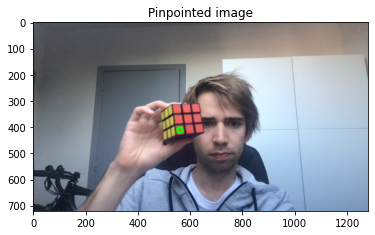

In [148]:
img = cv2.imread('latest-image-pinpoint.jpg')
rgb_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_im)
plt.title('Pinpointed image')
plt.show()